# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Ridha Ginanjar
- **Email:** ridha@dicoding.com
- **ID Dicoding:** ridha_dicoding

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kota mana yang paling banyak memiliki order?-> tujuannya untuk bisa kita lihat kota mana yang menjadi pelanggan terbesar e-commerce ini. Geospasial Analysis.
- Pertanyaan 2: Setelah didapat kota paling banyak order, cari produk apa yang paling banyak dibeli di kota tersebut? -> tujuannya untuk bisa kita lihat apakah produk tersebut bisa kita tingkatkan stoknya atau tidak.
- Pertanyaan 3: Mengelompokkan pelanggan berdasarkan perilaku pembelian (RFM Analysis)

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Import Setiap Dataset

In [7]:
customers = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/customers_dataset.csv")
geolocation = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/geolocation_dataset.csv")
order_items = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/order_items_dataset.csv")
order_payments = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/order_payments_dataset.csv")
order_reviews = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/order_reviews_dataset.csv")
orders = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/orders_dataset.csv")
product_category_name_translation = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/product_category_name_translation.csv")
products = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/products_dataset.csv")
sellers = pd.read_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/sellers_dataset.csv")

Mengambil Data Customers

In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Mengambil Dataset Geolocation

In [9]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Mengambil Dataset Order Items

In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Mengambil Dataset Order Payments

In [11]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Memeriksa nilai unik pada kolom payment_type

In [12]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

Mengambil Dataset Order Reviews

In [13]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Mengambil Dataset Orders

In [14]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Mencari nilai unik dari kolom order_status

In [15]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Filter hanya kolom dengan nilai canceled saja yang muncul untuk dataset orders.

In [16]:
orders[orders['order_status'] == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Mengambil Dataset Product Category Name Translation

In [17]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Mengambil Dataset Products

In [18]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Mengambil Dataset Sellers

In [19]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
Dari banyaknya dataset yang telah diketahui. Pengembang akan berfokus pada dua pertanyaan berikut yang bisa dipecahkan.
- Kota mana yang paling banyak memiliki order?-> tujuannya untuk bisa kita lihat kota mana yang menjadi pelanggan terbesar e-commerce ini.
- Setelah didapat kota paling banyak order, cari produk apa yang paling banyak dibeli di kota tersebut? -> tujuannya untuk bisa kita lihat apakah produk tersebut bisa kita tingkatkan stoknya atau tidak.
- Mengelompokkan pelanggan berdasarkan perilaku pembelian (RFM Analysis)

### Assessing Data

#### Checking products dataset

In [20]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight:**
Dataset products terhubung dengan orders dan order_items.

Kendati memiliki nilai null, saya belum menentukan apakah akan didrop atau diapakan. Kemungkinan perlu digabungkan terlebih dahulu tentang mengapa nilai tersebut menjadi null.

Akan mulai dikerjakan di tahap berikutnya.

#### Checking orders dataset

In [24]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [27]:
orders[orders['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


**Insight:**
Data ini terhubung order_item dan berisikan informasi apakah order berhasil dikirim, approved, atau pun canceled.

Penanganan terhadap data null, masih belum ditentukan karena perlu melihat alasan kenapa menjadi null.

#### Checking order_items dataset

In [28]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [29]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**

Dataset ini berisi informasi tentang product yang terjual sehingga terhubung dengan dataset seller dan order_items.

#### Checking customers dataset

In [31]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [33]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**

Dataset ini berisi informasi tentang customer termasuk lokasi geografisnya.

#### Checking order_payments dataset

In [34]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:**

Dataset ini berisi informasi pembayaran atas suatu order, meliputi dari tipe pembayaran hingga total pembayaran

### Cleaning Data

Di bagian cleaning, mari berfokus pada dataset yang akan digunakan untuk menjawab pertanyaan.

Berikut adalah detail datasetnya.
1. Untuk pertanyaan pertama dan kedua akan menggunakan dataset: **customers, order_items, dan orders**.
2. Pertanyaan ketiga berfokus pada RFM analysis yang melibatkan dataset: **orders**, **order_payments**, dan **customers**.

#### Pertanyaan 1 & 2: 5 Kota teratas yang memiliki jumlah pembelian terbanyak. & Produk yang paling banyak dibeli di kota dengan pembelian terbesar.

Asumsi order_status = delivered untuk semua produk yang telah terkirim


##### Strategi 1

Saya akan coba lakukan cleaning terhadap data orders terlebih dahulu. karena asumsinya produk berhasil sampai di pembeli jika order_status = 'delivered'.

Sehingga, mari kita cleaning dengan berfokus pada dataset approved terlebih dahulu.

In [37]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [38]:
orders_approved = orders[orders['order_status'] == 'delivered']
orders_approved

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Dengan tidak adanya duplikat di setiap customer id, bisa diasumsikan data yang dimiliki semuanya unique.

In [39]:
orders_approved[orders_approved['customer_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


##### Strategi 2: Merging dataset.

Memeriksa terlebih dahulu tipe data tiap index dataframe

In [40]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
orders_approved.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [43]:
## Lesson learned: Join bekerja dengan asumsi indexnya cocok.

merge_order = pd.merge(orders_approved, order_items, on='order_id', how='inner')
merge_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Lanjut merge dengan cutsomers

In [44]:
merge_cust_order = pd.merge(merge_order, customers, on='customer_id', how='inner')
merge_cust_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


##### Strategi 3: Membersihkan null value.

Delete null

In [45]:
merge_cust_order.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [46]:
merge_cust_order.dropna(inplace=True)

In [47]:
merge_cust_order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

**Insight:**

Dataset terbaru siap dipakai untuk menjawab pertanyaan pertama dan kedua.

Dataset merge_cust_order berisi informasi tentang customer yang berhasil melakukan order (dengan status order berhasil terkirim).

#### Pertanyaan 3: Recency, Frequency, and Monetary (RFM) Analysis

Karena dataframe order_payments bisa dimerge dengan dataset hasil merge sebelumnya. Akan lebih efektif jika semuanya digabung.

In [48]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [49]:
merge_cust_order_prod = pd.merge(merge_cust_order, products, on='product_id', how='inner')
merge_cust_order_prod.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,sao goncalo do amarante,RN,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,santo andre,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [50]:
merge_df = pd.merge(merge_cust_order_prod, order_payments, on='order_id', how='inner')
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,1,credit_card,3,179.12


Kendati memiliki nilai duplikat, informasi yang tersimpan ternyata disebabkan dalam satu transaksi satu customer bisa membeli banyak barang.

Oleh karena itu, setiap baris merepresentasikan satu barang yang customer beli.

In [51]:
merge_df[merge_df['product_id'] == '08574b074924071f4e201e151b152b4e']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
12,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,1,259.06
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,2,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,1,259.06
2828,ea7e528106f7ea156423a2cbafd75bc2,8d81bf44bb2e36dbfab5353d8b683420,delivered,2017-10-03 21:02:27,2017-10-05 03:04:19,2017-10-10 20:42:38,2017-10-31 21:12:01,2017-10-27 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,boleto,1,140.08
3880,8cda0578a690b3f9d6d86c95cd2ba7d4,4ad39f4021dcce82a5eebf9fd9dd7a6d,delivered,2017-09-21 15:30:39,2017-09-21 15:44:17,2017-09-22 19:50:09,2017-10-06 12:04:59,2017-10-19 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,10,140.08
5050,c1dd50c37114a20341bbf901157d726d,e506618caa63a29ae2cc528536f0d11e,delivered,2017-06-16 16:29:49,2017-06-16 16:45:13,2017-06-21 11:39:48,2017-06-26 16:06:23,2017-07-10 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,5,128.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109018,e5f79074dd3c736ad9dd29283f649012,4d7464b36ed0d3d31de9a3275be94f7f,delivered,2017-05-08 15:58:24,2017-05-08 16:10:24,2017-05-09 11:38:08,2017-05-17 11:32:53,2017-05-31 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,5,275.06
109019,e5f79074dd3c736ad9dd29283f649012,4d7464b36ed0d3d31de9a3275be94f7f,delivered,2017-05-08 15:58:24,2017-05-08 16:10:24,2017-05-09 11:38:08,2017-05-17 11:32:53,2017-05-31 00:00:00,2,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,5,275.06
109407,53d2e274628757ebe6882d41339d46af,1fff5bd495b4e1ccb35d4a2b51520803,delivered,2017-10-04 19:43:47,2017-10-04 19:56:18,2017-10-10 20:42:39,2017-10-20 17:45:21,2017-11-06 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,2,144.99
113683,65eabb940466e3db08bb339bdf5bb283,a37f4486aff8b096c3878e83a2ae0f1a,delivered,2017-05-07 18:45:14,2017-05-07 19:01:54,2017-05-09 07:56:57,2017-05-17 14:48:00,2017-05-31 00:00:00,1,08574b074924071f4e201e151b152b4e,...,450.0,1.0,9000.0,42.0,12.0,39.0,1,credit_card,8,275.06


In [52]:
merge_df.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

##### Filter dataset berdasarkan kolom yang dibutuhkan saja.

In [53]:
columns_list = ['customer_id', 'product_id', 'order_status', 'customer_city', 'customer_state', 'price',
           'payment_value', 'payment_type', 'product_category_name', 'order_delivered_customer_date']

merge_df = merge_df[columns_list]
merge_df.head()

,customer_id,product_id,order_status,customer_city,customer_state,price,payment_value,payment_type,product_category_name,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.12,credit_card,utilidades_domesticas,2017-10-10 21:25:13
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,2.00,voucher,utilidades_domesticas,2017-10-10 21:25:13
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.59,voucher,utilidades_domesticas,2017-10-10 21:25:13
3,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,delivered,barreiras,BA,118.70,141.46,boleto,perfumaria,2018-08-07 15:27:45
4,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,delivered,vianopolis,GO,159.90,179.12,credit_card,automotivo,2018-08-17 18:06:29


**Insight:**

Hasil akhir cleaning kali ini bertujuan untuk menghasilkan dataset yang bisa menjawab semua pertanyaan yang didefine sebelumnya.

Didapat dataset bernama merge_df yang mengandung informasi seputar product, customer, order, dan payments.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1: Kota dengan pembelian terbesar dan berhasil menyumbang 40% total transaksi (berdasarkan harga barang yang terjual).

In [54]:
merge_df.head()

,customer_id,product_id,order_status,customer_city,customer_state,price,payment_value,payment_type,product_category_name,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.12,credit_card,utilidades_domesticas,2017-10-10 21:25:13
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,2.00,voucher,utilidades_domesticas,2017-10-10 21:25:13
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.59,voucher,utilidades_domesticas,2017-10-10 21:25:13
3,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,delivered,barreiras,BA,118.70,141.46,boleto,perfumaria,2018-08-07 15:27:45
4,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,delivered,vianopolis,GO,159.90,179.12,credit_card,automotivo,2018-08-17 18:06:29


In [55]:
city_most_order = merge_df.groupby(by='customer_city')['price'].sum().sort_values(ascending=False).reset_index()
city_most_order.head()

,customer_city,price
0,sao paulo,1949872.31
1,rio de janeiro,992850.85
2,belo horizonte,357290.34
3,brasilia,306156.14
4,curitiba,212793.74


In [56]:
city_most_order.describe()

,price
count,4.085000e+03
mean,3.380840e+03
std,3.634620e+04
min,5.600000e+00
25%,1.499000e+02
50%,4.058800e+02
75%,1.340280e+03
max,1.949872e+06


##### Problem

Data yang dimiliki terlalu banyak. Perlu difilter dengan suatu kondisi.

Pada saat ini, kondisinya difilter dengan hanya memunculkan kota yang menyumbang 40% nilai total transkasi.

In [57]:
city_most_order['cumulative_sum'] = city_most_order['price'].cumsum() # Baris ini akan menghasilkan nilai kumulatif dari setiap price yang sudah dijumlahkan.
total = city_most_order['price'].sum()
city_most_order['cumcut'] = city_most_order['cumulative_sum']/total  # Baris ini akan menghasilkan setiap kotanya memberikan nilai kontribusinya seberapa besar (kumulatif tiap baris)

city_most_order_40 = city_most_order[city_most_order['cumcut'] <= 0.4]

city_most_order_40

,customer_city,price,cumulative_sum,cumcut
0,sao paulo,1949872.31,1949872.31,0.141185
1,rio de janeiro,992850.85,2942723.16,0.213075
2,belo horizonte,357290.34,3300013.50,0.238946
3,brasilia,306156.14,3606169.64,0.261114
4,curitiba,212793.74,3818963.38,0.276521
5,campinas,192439.83,4011403.21,0.290456
6,salvador,188844.18,4200247.39,0.304129
7,porto alegre,187214.05,4387461.44,0.317685
8,guarulhos,149738.68,4537200.12,0.328527
9,niteroi,130599.52,4667799.64,0.337984


**Insight:**

Dalam bentuk dataset, didapat informasi bahwa Sau Paulo merupakan kota dengan jumlah pembelian produk terbesar.

### Pertanyaan 2: Produk yang paling laris dibeli dari kota dengan pembelian terbanyak.

In [58]:
merge_df.head()

,customer_id,product_id,order_status,customer_city,customer_state,price,payment_value,payment_type,product_category_name,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.12,credit_card,utilidades_domesticas,2017-10-10 21:25:13
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,2.00,voucher,utilidades_domesticas,2017-10-10 21:25:13
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.59,voucher,utilidades_domesticas,2017-10-10 21:25:13
3,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,delivered,barreiras,BA,118.70,141.46,boleto,perfumaria,2018-08-07 15:27:45
4,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,delivered,vianopolis,GO,159.90,179.12,credit_card,automotivo,2018-08-17 18:06:29


In [59]:
df_sp = merge_df[merge_df['customer_city'] == 'sao paulo']
df_sp.head()

,customer_id,product_id,order_status,customer_city,customer_state,price,payment_value,payment_type,product_category_name,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.12,credit_card,utilidades_domesticas,2017-10-10 21:25:13
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,2.00,voucher,utilidades_domesticas,2017-10-10 21:25:13
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.59,voucher,utilidades_domesticas,2017-10-10 21:25:13
14,7711cf624183d843aafe81855097bc37,f7e0fa615b386bc9a8b9eb52bc1fff76,delivered,sao paulo,SP,98.00,114.13,credit_card,informatica_acessorios,2017-07-19 14:04:48
16,19402a48fe860416adf93348aba37740,10adb53d8faa890ca7c2f0cbcb68d777,delivered,sao paulo,SP,19.90,32.70,credit_card,cama_mesa_banho,2018-07-30 15:52:25


In [60]:
product_most_buy = df_sp.groupby(by='product_category_name')['price'].sum().sort_values(ascending=False).reset_index()
product_most_buy.head()

,product_category_name,price
0,beleza_saude,191012.70
1,cama_mesa_banho,177953.99
2,relogios_presentes,165744.90
3,esporte_lazer,149196.70
4,informatica_acessorios,141512.61


**Insight:**

Di Sao Paulo, kategori produk beleza_saude merupakan produk dengan pembelian terbanyak dengan mencapai harga 191012 USD.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota dengan pembelian terbesar dan berhasil menyumbang 40% total transaksi (berdasarkan harga barang yang terjual).

In [61]:
remapping = {
    'sao bernardo do campo': 's.b. campo'
}
city_most_order_40.replace(remapping, inplace=True)

/tmp/ipykernel_1351/3162878031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_most_order_40.replace(remapping, inplace=True)


In [62]:
city_most_order_40["label"] = city_most_order_40['customer_city'] + "\nUSD:" + city_most_order_40['price'].astype(str)
city_most_order_40.head()

/tmp/ipykernel_1351/2134053320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_most_order_40["label"] = city_most_order_40['customer_city'] + "\nUSD:" + city_most_order_40['price'].astype(str)


,customer_city,price,cumulative_sum,cumcut,label
0,sao paulo,1949872.31,1949872.31,0.141185,sao paulo\nUSD:1949872.31
1,rio de janeiro,992850.85,2942723.16,0.213075,rio de janeiro\nUSD:992850.85
2,belo horizonte,357290.34,3300013.50,0.238946,belo horizonte\nUSD:357290.34
3,brasilia,306156.14,3606169.64,0.261114,brasilia\nUSD:306156.14
4,curitiba,212793.74,3818963.38,0.276521,curitiba\nUSD:212793.74


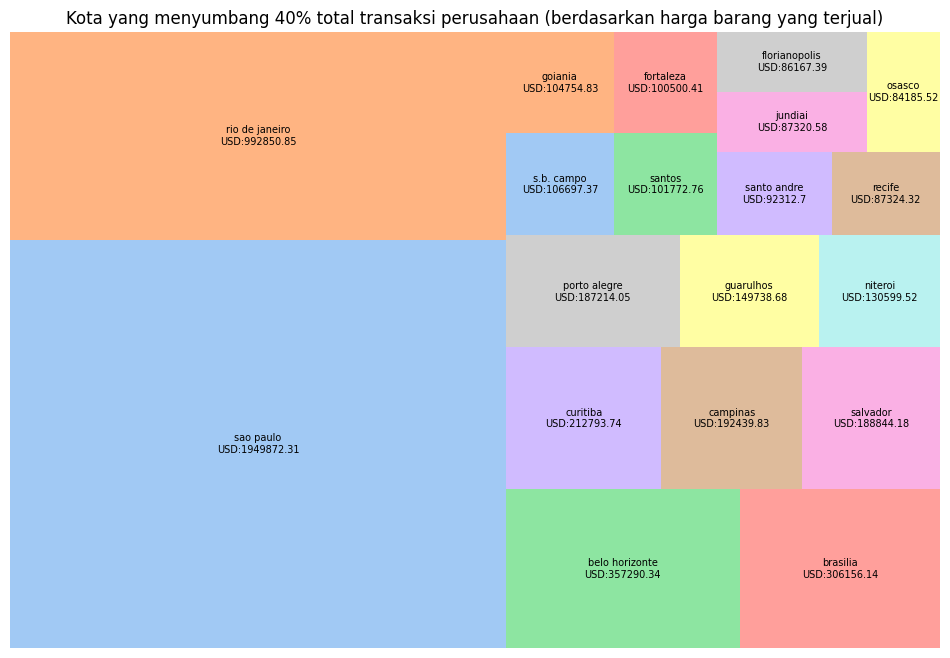

In [63]:
# Visualisasi Treemap
import squarify

plt.figure(figsize=(12, 8))
squarify.plot(sizes=city_most_order_40.price, label=city_most_order_40.label, color=sns.color_palette("pastel"), text_kwargs={'fontsize':7})
plt.title('Kota yang menyumbang 40% total transaksi perusahaan (berdasarkan harga barang yang terjual)')
plt.axis('off')
plt.show()


**Insight (Jawaban atas pertanyaan yang diajukan):**


Sao Paulo merupakan kota yang memiliki nilai barang yang terjual tertinggi mencapai 1949872 US Dollar.

Hal ini menjadikan kota ini sebagai kota dengan sumbangsih terbesar pada total transaksi. Diikuti oleh Rio de Janeiro di peringkat kedua dengan total harga barang terjual mencapai 992850 US Dollar.

### Pertanyaan 2: Produk yang paling laris dibeli dari kota Sao Paulo dengan pembelian terbanyak dengan menyumbang 50% transaksi.

In [64]:
product_most_buy['cumulative_sum'] = product_most_buy['price'].cumsum()
total = product_most_buy['price'].sum()
product_most_buy['cumcut'] = product_most_buy['cumulative_sum']/total

product_most_buy.head()

,product_category_name,price,cumulative_sum,cumcut
0,beleza_saude,191012.70,191012.70,0.099426
1,cama_mesa_banho,177953.99,368966.69,0.192054
2,relogios_presentes,165744.90,534711.59,0.278327
3,esporte_lazer,149196.70,683908.29,0.355987
4,informatica_acessorios,141512.61,825420.90,0.429647


In [65]:
# Mencari produk yang memberikan sumbangsih 70% pada transaksi
top_product_most_buy = product_most_buy[product_most_buy['cumcut'] <=0.7]
top_product_most_buy['label'] = top_product_most_buy['product_category_name'] + "\nUSD: " + top_product_most_buy['price'].astype("str")
top_product_most_buy.head()

/tmp/ipykernel_1351/4127081968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_product_most_buy['label'] = top_product_most_buy['product_category_name'] + "\nUSD: " + top_product_most_buy['price'].astype("str")


,product_category_name,price,cumulative_sum,cumcut,label
0,beleza_saude,191012.70,191012.70,0.099426,beleza_saude\nUSD: 191012.7
1,cama_mesa_banho,177953.99,368966.69,0.192054,cama_mesa_banho\nUSD: 177953.99
2,relogios_presentes,165744.90,534711.59,0.278327,relogios_presentes\nUSD: 165744.9
3,esporte_lazer,149196.70,683908.29,0.355987,esporte_lazer\nUSD: 149196.7
4,informatica_acessorios,141512.61,825420.90,0.429647,informatica_acessorios\nUSD: 141512.61000000002


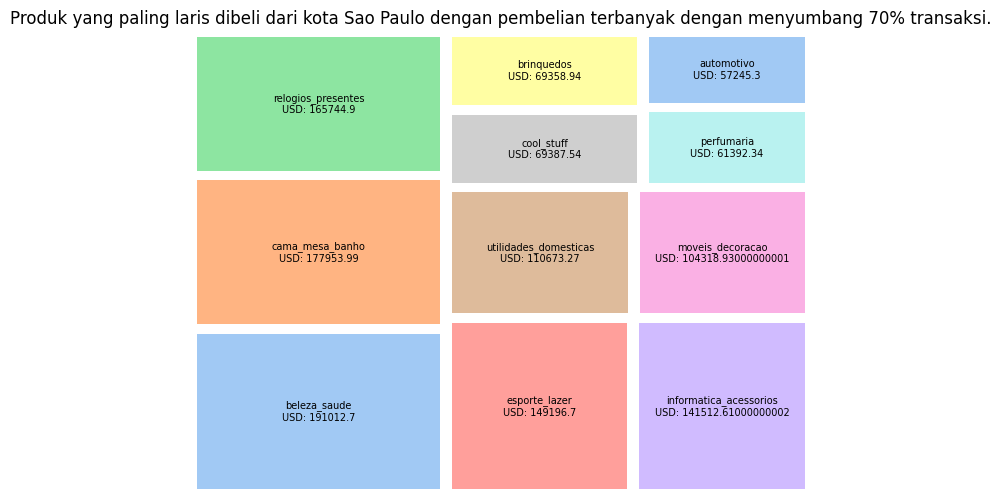

In [66]:
# Visualisasi Treemap
import squarify

plt.figure(figsize=(8, 6))
squarify.plot(sizes=top_product_most_buy.price, label=top_product_most_buy.label, color=sns.color_palette("pastel"), text_kwargs={'fontsize':7}, pad=2)
plt.title('Produk yang paling laris dibeli dari kota Sao Paulo dengan pembelian terbanyak dengan menyumbang 70% transaksi.')
plt.axis('off')
plt.show()

**Insight:**

Di kota Sao Paulo, kategori produk Beleza Saude, Cama Mesa Banho, dan Relogios Presentes merupakan urutan ketiga teratas yang berhasil terjual dan menjadi paling banyak dibeli.

Ketiga barang tersebut memberikan kontribusi besar pada 70% transaksi yang terjadi di kota tersebut.

## Analisis Lanjutan (Opsional) -- Pertanyaan 3: RFM Analysis (Customer Segmentation)

Memeriksa dataset

In [67]:
merge_df.head()

,customer_id,product_id,order_status,customer_city,customer_state,price,payment_value,payment_type,product_category_name,order_delivered_customer_date
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.12,credit_card,utilidades_domesticas,2017-10-10 21:25:13
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,2.00,voucher,utilidades_domesticas,2017-10-10 21:25:13
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,delivered,sao paulo,SP,29.99,18.59,voucher,utilidades_domesticas,2017-10-10 21:25:13
3,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,delivered,barreiras,BA,118.70,141.46,boleto,perfumaria,2018-08-07 15:27:45
4,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,delivered,vianopolis,GO,159.90,179.12,credit_card,automotivo,2018-08-17 18:06:29


Ganti kolom "order_delivered_customer_date" menjadi datetime

In [68]:
merge_df['order_delivered_customer_date'] = pd.to_datetime(merge_df['order_delivered_customer_date'])

Mencari transaksi terakhir

In [69]:
merge_df['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

##### Membuat RFM

In [70]:
last_transaction = merge_df['order_delivered_customer_date'].max()

rfm = merge_df.groupby(by='customer_id').agg({
    'order_delivered_customer_date': lambda x: (last_transaction - x.max()).days,
    'price': ['count', 'sum']
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.reset_index(inplace=True)
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80
1,000161a058600d5901f007fab4c27140,448,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90
4,000379cdec625522490c315e70c7a9fb,186,1,93.00


Scoring

In [71]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[5,4,3,2,1])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[5,4,3,2,1])

rfm['RFM_score'] = rfm['R_score'].astype("str") + rfm['F_score'].astype("str") + rfm['M_score'].astype("str")
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80,2,3,3,233
1,000161a058600d5901f007fab4c27140,448,1,54.90,1,4,4,144
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99,1,1,1,111
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90,2,2,2,222
4,000379cdec625522490c315e70c7a9fb,186,1,93.00,4,3,3,433


##### Leveling RFM

###### Customer dengan nilai RFM sempurna (555)

In [72]:
champions = rfm[rfm['RFM_score'] == '555']
champions

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
40,001df1ee5c36767aa607001ab1a13a06,67,1,29.99,5,5,5,555
52,002905287304e28c0218389269b4759b,70,1,13.47,5,5,5,555
150,006866a6f9ef10d3a85292859c4deae1,60,1,18.95,5,5,5,555
166,007182cdc3e8e2d3d4ce0b00b9004630,96,1,13.99,5,5,5,555
195,0086b541a59fa554e7953e2d3c285285,74,1,35.00,5,5,5,555
...,...,...,...,...,...,...,...,...
96301,ff9ec39d2bb09243f0139f792ad1ec7b,48,1,38.00,5,5,5,555
96371,ffc25a124da207c0b90a002ebfaa7184,85,1,36.00,5,5,5,555
96385,ffcdcb5ab4283658114e8077b9340a16,103,1,39.00,5,5,5,555
96417,ffe6224c02307bc5fd2e5c7566bd674a,110,1,24.99,5,5,5,555


###### Customer dengan Recency tinggi.

In [73]:
top_recency = rfm[rfm['R_score'] == 5]
top_recency

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
9,000598caf2ef4117407665ac33275130,57,1,1107.00,5,1,1,511
10,0005aefbb696d34b3424dccd0a0e9fd0,116,1,134.90,5,2,2,522
31,0015bc9fd2d5395446143e8b215d7c75,125,1,122.99,5,2,2,522
34,0018c09f333634ca9c80d9ff46e43e9c,101,1,42.99,5,4,4,544
40,001df1ee5c36767aa607001ab1a13a06,67,1,29.99,5,5,5,555
...,...,...,...,...,...,...,...,...
96432,fff212062d600f2e1d53f3c5d4a25138,56,1,49.99,5,4,4,544
96434,fff39f01a81d96b066b1893ad395a98b,104,1,9.90,5,5,5,555
96446,fff93c1da78dafaaa304ff032abc6205,118,3,198.89,5,1,1,511
96451,fffeda5b6d849fbd39689bb92087f431,130,1,47.90,5,4,4,544


###### Customer dengan Frequency tinggi.

In [74]:
top_frequency = rfm[rfm['F_score'] == 5]
top_frequency

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
6,000419c5494106c306a97b5635748086,182,1,34.30,4,5,5,455
15,000bf8121c3412d3057d32371c5d3395,365,2,30.00,2,5,5,255
19,0010068a73b7c56da5758c3f9e5c7375,529,1,29.99,1,5,5,155
20,001028b78fd413e19704b3867c369d3a,183,1,29.90,4,5,5,455
24,001226b2341ef620415ce7bbafcfac28,372,1,29.90,2,5,5,255
...,...,...,...,...,...,...,...,...
96438,fff4fdd0de70a51d4e0f57a4c1c6bfae,187,1,13.65,4,5,5,455
96440,fff55ba8dffa552b6fdfd86c2e806459,251,1,14.90,3,5,5,355
96444,fff89c8ed4fcf69a823c1d149e429a0b,286,1,30.00,3,5,5,355
96447,fffa0238b217e18a8adeeda0669923a3,398,1,35.00,2,5,5,255


###### Customer dengan Monetary tinggi.

In [77]:
top_monetary = rfm[rfm['M_score'] == 5]
top_monetary

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
6,000419c5494106c306a97b5635748086,182,1,34.30,4,5,5,455
15,000bf8121c3412d3057d32371c5d3395,365,2,30.00,2,5,5,255
19,0010068a73b7c56da5758c3f9e5c7375,529,1,29.99,1,5,5,155
20,001028b78fd413e19704b3867c369d3a,183,1,29.90,4,5,5,455
24,001226b2341ef620415ce7bbafcfac28,372,1,29.90,2,5,5,255
...,...,...,...,...,...,...,...,...
96438,fff4fdd0de70a51d4e0f57a4c1c6bfae,187,1,13.65,4,5,5,455
96440,fff55ba8dffa552b6fdfd86c2e806459,251,1,14.90,3,5,5,355
96444,fff89c8ed4fcf69a823c1d149e429a0b,286,1,30.00,3,5,5,355
96447,fffa0238b217e18a8adeeda0669923a3,398,1,35.00,2,5,5,255


##### Visualisasi Data RFM

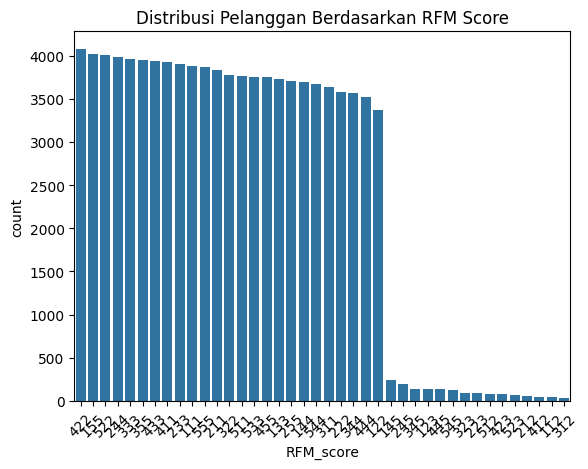

In [79]:
sns.countplot(data=rfm, x='RFM_score', order=rfm['RFM_score'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Pelanggan Berdasarkan RFM Score")
plt.show()


**Insight visualisasi:**

Dari visualisasi di atas, bisa disimpulkan bahwa score Recency 4, Frequency 2, dan Monetary 2 menempati posisi dengan customer terbanyak.
Artinya, banyak customer yang dikategorikan loyal dengan e-commerce ini. 

Bahkan, berbeda sedikit selisihnya dengan Recency 1, Frequency 5, dan Monetary 5 yang menempati posisi kedua.
Segmentasi ini walaupun jarang membeli, tapi sekalinya membeli selalu dalam jumlah besar dan frekuensi yang banyak.

# Menyimpan semua dataset

In [84]:
top_monetary.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/top_monetary.csv")
top_frequency.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/top_frequency.csv")
top_recency.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/top_recency.csv")
champions.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/champions.csv")
top_product_most_buy.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/top_product_most_buy.csv")
city_most_order_40.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/city_most_order_40.csv")
city_most_order.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/city_most_order.csv")
rfm.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/rfm.csv")
product_most_buy.to_csv("~/Dicoding/analisis-data-dicoding/submission-analisis-data/datasets/finals/product_most_buy.csv")

## Conclusion

Dari Analisis yang dilakukan proyek ini. Dapat disimpulkan berikut.

- Pertanyaan 1
> Sao Paulo merupakan kota yang memiliki nilai barang yang terjual tertinggi mencapai 1949872 US Dollar.
> Hal ini menjadikan kota ini sebagai kota dengan sumbangsih terbesar pada total transaksi. Diikuti oleh Rio de Janeiro di peringkat kedua dengan total harga barang terjual mencapai 992850 US Dollar.


- Pertanyaan 2
> Di kota Sao Paulo, kategori produk Beleza Saude, Cama Mesa Banho, dan Relogios Presentes merupakan urutan ketiga teratas yang berhasil terjual dan menjadi paling banyak dibeli.
> Ketiga barang tersebut memberikan kontribusi besar pada 70% transaksi yang terjadi di kota tersebut.

- Pertanyaan 3: Analisis Lanjutan dengan RFM Analysis
> Dengan melakukan pendekatan customer segmentation, terdapat 4 kelompok segmentasi pelanggan yang bisa ditargetkan untuk campaign.
>  - Kelompok **champions** dengan score RFM sempurna (semuanya bernilai 5) yang artinya memiliki loyalitas dan royalitas yang tinggi. Sebanyak 3874 customer dapat dijadikan target utama untuk berbagai campaign perusahaan.
>  - Kelompok **Recency** yang paling tinggi (dengan skor 5) yang artinya memiliki loyalitas tinggi dengan sering berbelanja di e-commerce. Sebanyak 19338 customer dapat dijadikan target utama untuk campaign-campaign baru yang akan hadir dalam waktu dekat.
>  - Kelompok **Frequency** yang paling tinggi (dengan skor 5) yang artinya memiliki royalitas tinggi dengan berbelanja banyak di e-commerce. Sebanyak 19291 customer dapat dijadikan target utama untuk campaign yang berfokus pada banyak-banyakan produk dibeli misalnya "Buy 2 get 1".
>  - Kelompok **Monetary** yang paling tinggi (dengan skor 5) yang artinya memiliki royalitas yang tinggi juga dengan jumlah uang yang dikeluarkan untuk berbelanja dikategorikan sangat tinggi. Sebanyak 20140 customer masuk dalam kategori ini sehingga bisa digunakan untuk campaign yang berfokus pada jumlah produk yang dibeli, misalnya "minimal beli 5 juta mendapatkan diskon 500k".